In [175]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## Get Data

In [176]:
df_kend_train = pd.read_csv('./../dataset/kendaraan_train_clean.csv')
df_kend_train.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
75153,1.0,0.369231,1.0,0.634615,0.0,0.0,0.0,0.354283,0.154321,0.024221
56915,1.0,0.015385,1.0,0.903846,1.0,0.5,0.0,0.443968,0.932099,0.726644
167868,0.0,0.538462,1.0,0.538462,0.0,0.0,0.0,0.808862,0.759259,0.667820
94470,1.0,0.015385,1.0,0.250000,1.0,0.5,1.0,0.398072,0.981481,0.013841
10548,0.0,0.430769,1.0,0.153846,0.0,0.0,0.0,0.869715,0.154321,0.221453


## Select Attribute for Clustering

C:\Users\user\AppData\Local\Temp/ipykernel_24104/2413644259.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_kend_train.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

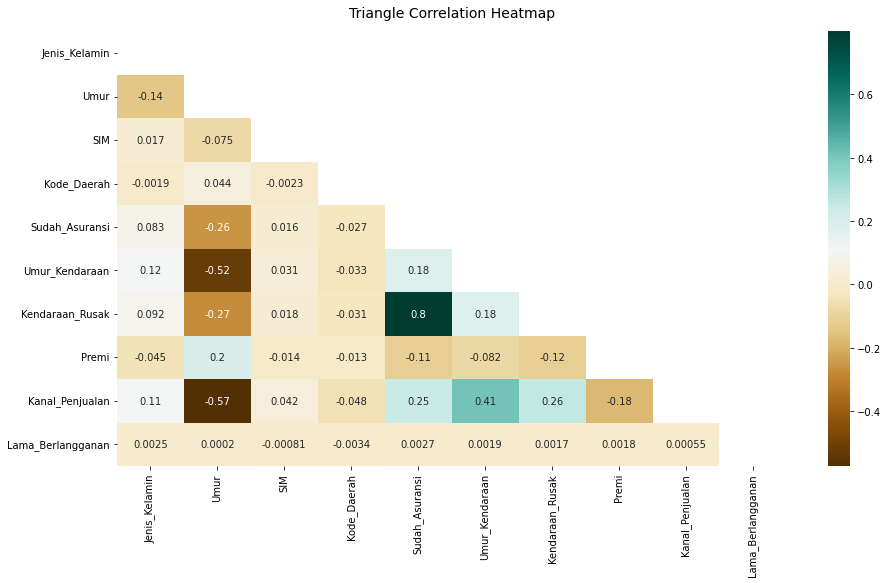

In [177]:
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_kend_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_kend_train.corr(), mask=mask, annot=True, cmap="BrBG")
heatmap.set_title("Triangle Correlation Heatmap", fontdict={'fontsize': 14}, pad=14)

In [178]:
df_kend_train =df_kend_train[['Umur', 'Kanal_Penjualan']]
df = df_kend_train.copy()
df.head()

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.015385,0.981481
3,0.461538,0.537037
4,0.015385,0.932099


In [179]:
print("Total Data", len(df))

Total Data 230625


## Kmeans Function

### Initiate Centroid with Random Value

In [180]:
def initialCentroid(k, df):
  randValue = {i: df[random.randint(0, len(df))] for i in range(k)}
  return randValue

### Calculate Distance Using Euclidean

In [181]:
def calcEuclidean(a, b):
  return math.sqrt((a[0]-b[0])**2 + (a[1] - b[1])**2)

def calcDist(df, cluster, centroid):
  for row in df:
    dist = [calcEuclidean(row, centroid[cen]) for cen in centroid]
    cluster[dist.index(min(dist))].append(row)
  return cluster

### Set New Centroid

In [182]:
def setCentroid(centroid, clusters):
  for cluster in clusters:
    centroid[cluster]= np.mean(clusters[cluster], axis=0)
  return centroid

### Main Function KMeans

In [183]:
def kMeans(k, df):    
  centroid = initialCentroid(k, df)
  print(centroid)

  old_centroid = centroid.copy()
  same = False
  i = 0
  while(same == False):
    cluster = {i: [] for i in range(k)}
    cluster = calcDist(df, cluster, centroid)    
    centroid = setCentroid(centroid, cluster)        
    same = False
    for key in cluster.keys():      
      if((old_centroid.get(key) == centroid.get(key))[0]):
        same = True
        break    
    
    old_centroid = centroid.copy()
    i+=1
  print('Perulangan ke', i-1)
  print('Hasil Akhir Cluster:')
  for key in centroid.keys():
    print(key, ': ', centroid.get(key))
  
  return centroid, cluster



## Main

In [184]:
# convert to array agar lebih mudah memprosesnya
data = df.to_numpy()
k = 3

centroid, cluster = kMeans(k, data)

{0: array([0.52307692, 0.94444444]), 1: array([0.04615385, 0.93209877]), 2: array([0.03076923, 0.93209877])}
Perulangan ke 9
Hasil Akhir Cluster:
0 :  [0.4684688  0.15268037]
1 :  [0.46823886 0.7715296 ]
2 :  [0.09607545 0.91460476]


## Proses Hasil

In [185]:
def convDf(clus):
  df_hasil = []
  # print(cluster.keys())
  for key in clus.keys():
    for c in clus.get(key):
      df_hasil.append((c[0], c[1], key))
  df_hasil = pd.DataFrame(df_hasil)
  df_hasil.columns = ['Umur', 'Kanal_Penjualan', 'Cluster']
  return df_hasil

df_hasil = convDf(cluster)
df_hasil.sample(5)

,Umur,Kanal_Penjualan,Cluster
134637,0.015385,0.932099,2
205058,0.169231,0.759259,2
89693,0.892308,0.759259,1
90287,0.707692,0.759259,1
183127,0.076923,0.932099,2


## Visualisasi

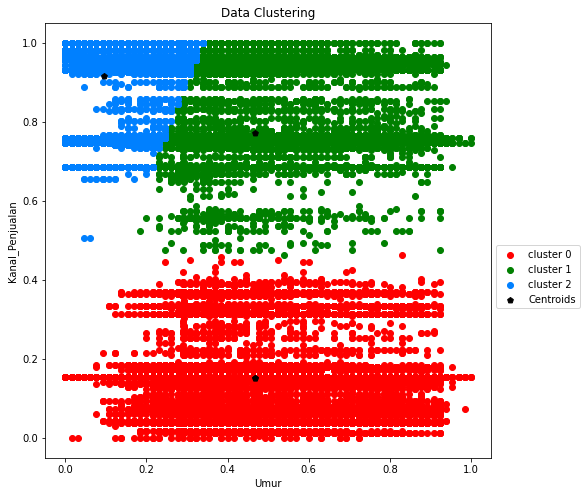

In [186]:
colors = ['r', 'g', '#0080FF', '#e69500', '#e89500']

plt.figure(figsize=(8,8))
plt.title('Data Clustering')

for i in range(k):
  plt.scatter(
    df_hasil['Umur'][df_hasil['Cluster'] == i],
    df_hasil['Kanal_Penjualan'][df_hasil['Cluster'] == i],
    color=colors[i],
    label=f'cluster {i}'
  )

  plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='p')

plt.scatter(centroid[0][0], centroid[0][1], color='k', label='Centroids', marker='p')

plt.xlabel("Umur")
plt.ylabel("Kanal_Penjualan")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## Evaluasi Model

### Elbow Method

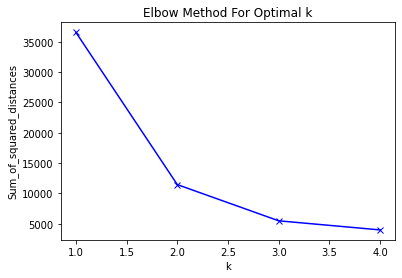

In [187]:
# # Menentukan nilai SSE terlebih dahulu
# def sse(df,centroid):
#   sum = 0
#   for i in range(len(centroid)):
#     j = i+1
    
#     k = df[(df['Cluster'] == j)]['{}'.format(j)]**2
#     sum += k.sum()
#   return sum

# # Menentukan nilai WCSS
# wcss = []
# data = df.to_numpy()
# for i in range(1,2): 
#   centroid, cluster = kMeans(i+1, 12, data)
#   df_hasil = convDf(cluster)
#   print(df_hasil.sample(5))
#   wcss.append(sse(df_hasil, centroid))
#   print('K=',i+1,'| Distortion: ',wcss[i])

# # Visualization
# plt.plot(range(1, 6), wcss, '-bx')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

SS_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    SS_distances.append(km.inertia_)

plt.plot(K, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()